In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
%matplotlib inline

In [2]:
data=pd.read_csv("Advertising.csv")
print(data)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [3]:
data.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [4]:
data.tail(10)

,TV,Radio,Newspaper,Sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,11.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


Indepenent variables
TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars) Radio: Advertising dollars spent on Radio Newspaper: Advertising dollars spent on Newspaper Target Variable

Sales: sales of a single product in a given market (in thousands of widgets)

In [5]:
data.shape

(200, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


`Univariate Analysis

We summarize and find patterns indicative of its nature

In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
def check(data):
    l=[]
    columns=data.columns
    for col in columns:
        dtypes=data[col].dtypes
        nunique=data[col].nunique()
        sum_null=data[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    data_check=pd.DataFrame(l)
    data_check.columns=['column','dtypes','nunique','sum_null']
    return data_check 

In [9]:
check(data)

,column,dtypes,nunique,sum_null
0,TV,float64,190,0
1,Radio,float64,167,0
2,Newspaper,float64,172,0
3,Sales,float64,121,0


In [11]:
x = data['Sales']
np.mean(x)

15.130500000000005

In [12]:
t,p = stats.ttest_1samp(x,14)
print('t-statistic = %.4f, p-value = %.4f'%(t,p))

<IPython.core.display.Javascript object>

t-statistic = 3.0257, p-value = 0.0028


In [13]:
ll,ul = stats.t.interval(alpha=0.95,df=len(x)-1, loc = np.mean(x), scale = stats.sem(x))
print("CI for Sales = (%.4f,%.4f)"%(ll,ul))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CI for Sales = (14.3937,15.8673)


C:\Users\sarsw\AppData\Local\Temp\ipykernel_20516\2699061373.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ll,ul = stats.t.interval(alpha=0.95,df=len(x)-1, loc = np.mean(x), scale = stats.sem(x))


Bivariate Analysis


Finding associations and differences between two variables. Measuring the significance of such associations or differences.

Correlation Analysis

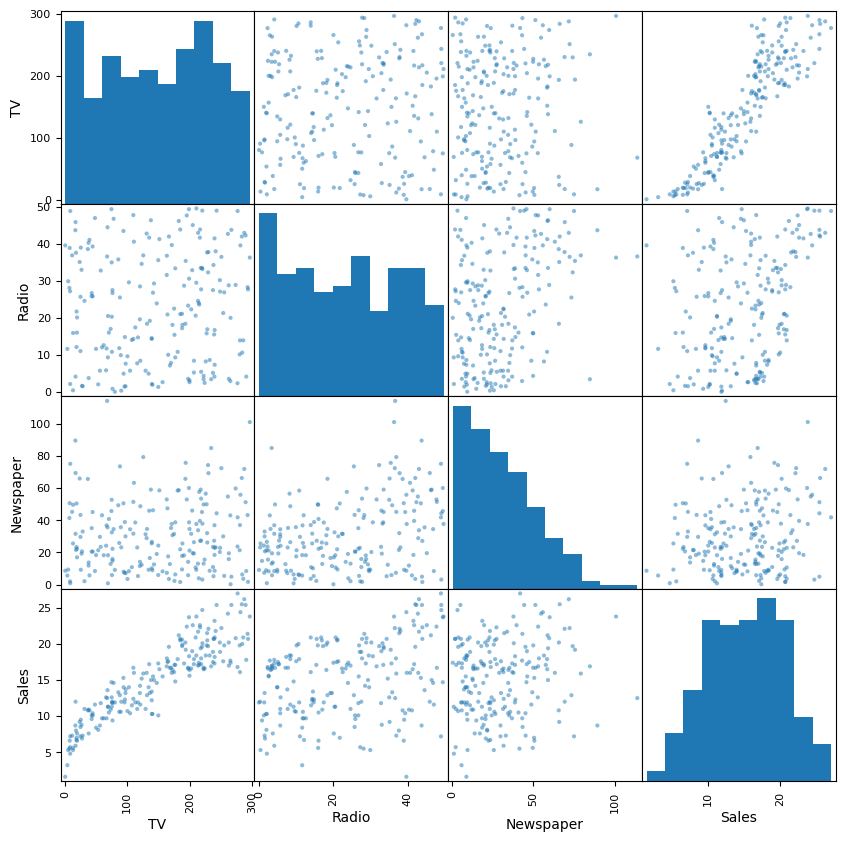

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['TV','Radio','Newspaper','Sales']],
              figsize=(10,10))
plt.show()

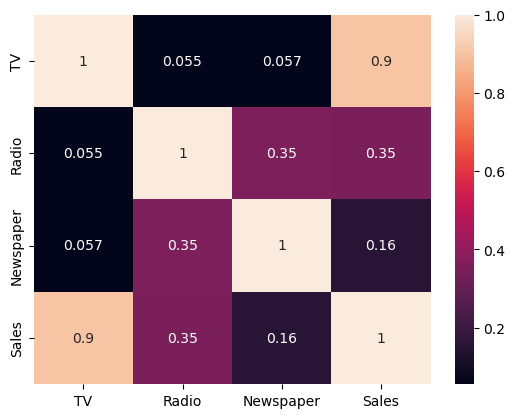

In [15]:
dataplot = sns.heatmap(data.corr(),annot = True)
plt.show()

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

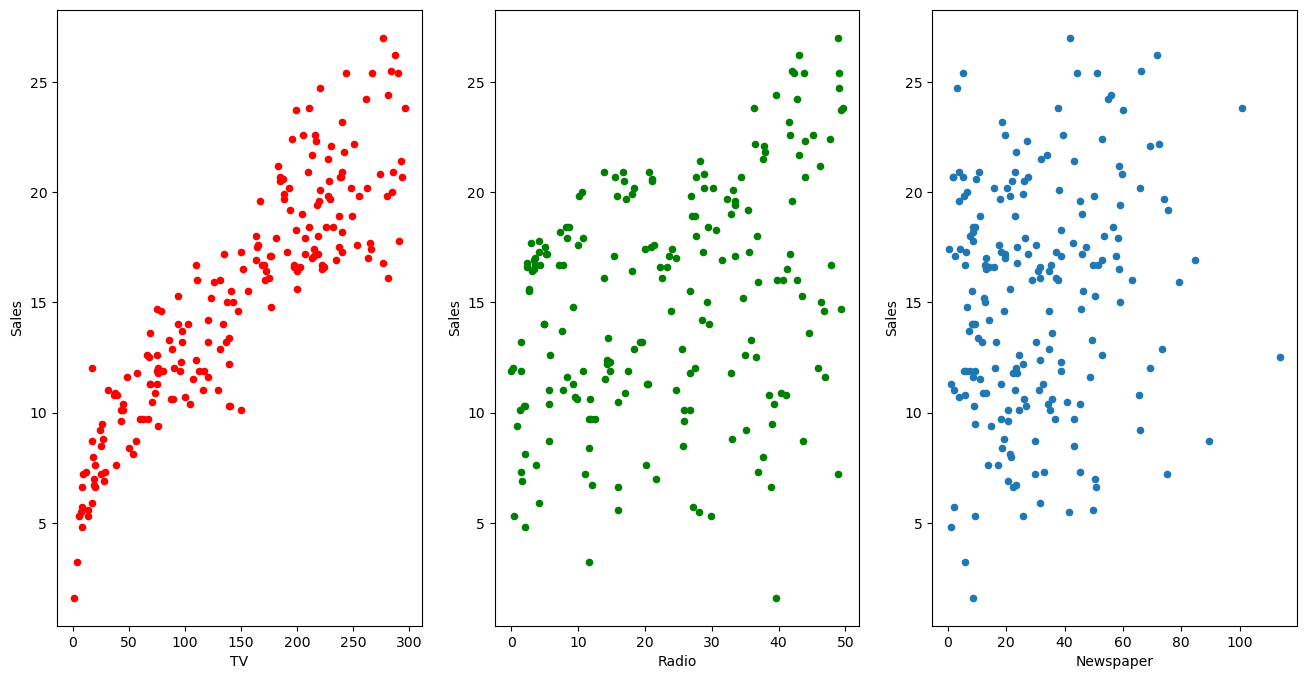

In [16]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8),c='r')
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1],c='g')
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

Questions About the Advertising Data

On the basis of this data, how should you spend advertising money in the future?
1.Is there a relationship between ads and sales?
2.How strong is that relationship?
3.Which ad types contribute to sales?
4.What is the effect of each ad type of sales?
5.Given ad spending, can sales be predicted?

In [17]:
# create X and y
#taking only one variable for now
feature_cols = ['TV']
X = data[["TV"]]
y = data['Sales']

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

6.9748214882298925
[0.05546477]


y = 0.04753 * TV + 7.032593549127695

Plotting the Least Square Line

Let's make predictions for the smallest and largest observed values of x, and then use the predicted values to plot the least squares line:

In [18]:
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


<AxesSubplot:xlabel='TV', ylabel='Sales'>

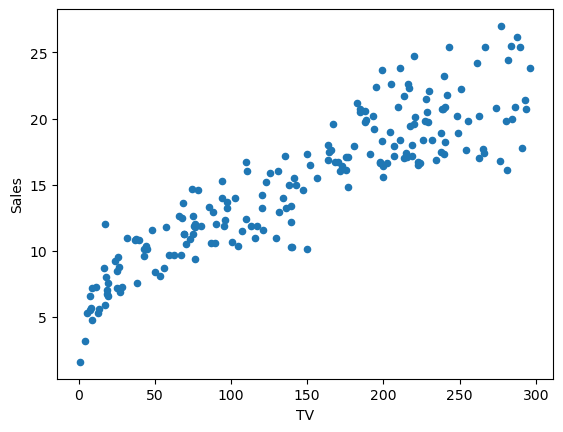

In [19]:
# The observed data
data.plot(kind='scatter', x='TV', y='Sales')

In [20]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV',data=data).fit() #~separates,+add, C(), :new, 
print(lm.conf_int())
lm.params

                  0         1
Intercept  6.338740  7.610903
TV         0.051727  0.059203


Intercept    6.974821
TV           0.055465
dtype: float64

In [21]:
lm.pvalues

Intercept    5.027719e-54
TV           7.927912e-74
dtype: float64

In [22]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           7.93e-74
Time:                        16:09:00   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9748      0.323     21.624      0.000       6.339       7.611
TV             0.0555      0.002     29.260      0.000       0.052       0.059
==============================================================================
Omnibus:                        0.013   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.043
Skew:                          -0.018   Prob(JB):                        0.979
Kurtosis:                       2.938   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data.iloc[:, :-1]
y = data.Sales

#create train and test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=5)

xtrain

,TV,Radio,Newspaper
123,123.1,34.6,12.4
107,90.4,0.3,23.2
43,206.9,8.4,26.4
152,197.6,23.3,14.2
114,78.2,46.8,34.5
...,...,...,...
73,129.4,5.7,31.3
144,96.2,14.8,38.9
118,125.7,36.9,79.2
189,18.7,12.1,23.4


In [24]:
#without using train and test split dataset
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

4.625124078808653
[0.05444578 0.10700123 0.00033566]


In [25]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

#using train, test datasets

lm = LinearRegression()
lm.fit(xtrain, ytrain)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)


#predictions  on test dataset
predictions = lm.predict(xtest)
print(np.sqrt(mean_squared_error(ytest, predictions)))

4.683139686396741
[ 0.05422023  0.10809586 -0.00063085]
1.408444068559567


In [26]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
print(lm.conf_int())
lm.summary()

                  0         1
Intercept  4.018688  5.231560
TV         0.051734  0.057158
Radio      0.090259  0.123744
Newspaper -0.011079  0.011751


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           8.13e-99
Time:                        16:10:11   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# only include TV and Radio in the model
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm.rsquared

0.9025896186081139

In [28]:
# add Newspaper to the model (which has no association with Sales)
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.rsquared

0.9025912899684558

In [ ]:
#Taking the input from the user
print("Enter the ammount you will invest on:")
tv = float(input("TV : "))
radio = float(input("Radio : "))
newspaper = float(input("Newspaper : "))

#predicting the sales with respect to the inputs
output = lm.predict([[tv,radio,newspaper]])
print("you will get Rs{:.2f} sales by advertising Rs{} on TV, Rs{} on Radio and Rs{} on newspaper."\
      .format(output[0][0] if output else "not predictable",tv,radio,newspaper))

Enter the ammount you will invest on:


TV :  1
Radio :  1
Newspaper :  1
